In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
fast_base = pd.read_json("../results_06_01/FAST_KNN_NO_ObjIndex_base2_sub_timeline_1000000_500000.csv", lines=True)
fast_const_buffer = pd.read_json("../results_06_01/FAST_KNN_NO_ObjIndex_const_buffer2_sub_timeline_1000000_500000.csv", lines=True)

# fast_base = pd.read_json("../results_06_01/FAST_KNN_NO_ObjIndex_base3_sub_timeline_1000000_500000.csv", lines=True)
# fast_const_buffer = pd.read_json("../results_06_01/FAST_KNN_NO_ObjIndex_const_buffer3_sub_timeline_1000000_500000.csv", lines=True)
# fast_ctime['name'] = 'fast'

fast_base_summary = pd.read_csv("../results_06_01/FAST_KNN_NO_ObjIndex_base2.csv")
fast_const_buffer_summary = pd.read_csv("../results_06_01/FAST_KNN_NO_ObjIndex_const_buffer2.csv")

summary = pd.concat([fast_base_summary, fast_const_buffer_summary])

## Summary

In [3]:
summary

,name,creation_time,search_time,create_mem,search_mem,num_queries,num_objects,k,knn_deg_ratio,knn_ar_thresh
0,FAST_KNN_NO_ObjIndex_base2,746247613153,32513658413,0,0,1000000,500000,5,10,5.0
0,FAST_KNN_NO_ObjIndex_const_buffer2,603120581380,35479285914,0,0,1000000,500000,5,10,5.0


## Creation time

In [4]:
def plot_all_ins(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 200000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Query Index)', 'Search (Obj. Index)', 'Total Descend Count'])

    plt.show()

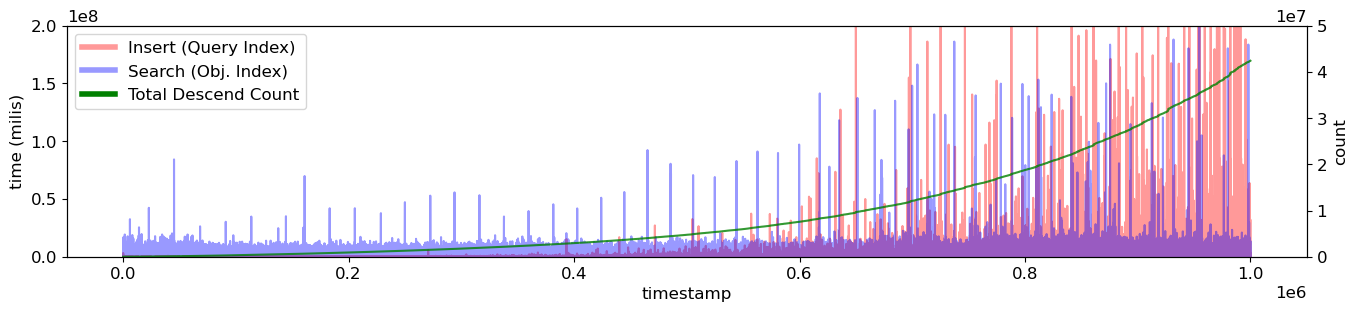

In [5]:
plot_all_ins(fast_base)

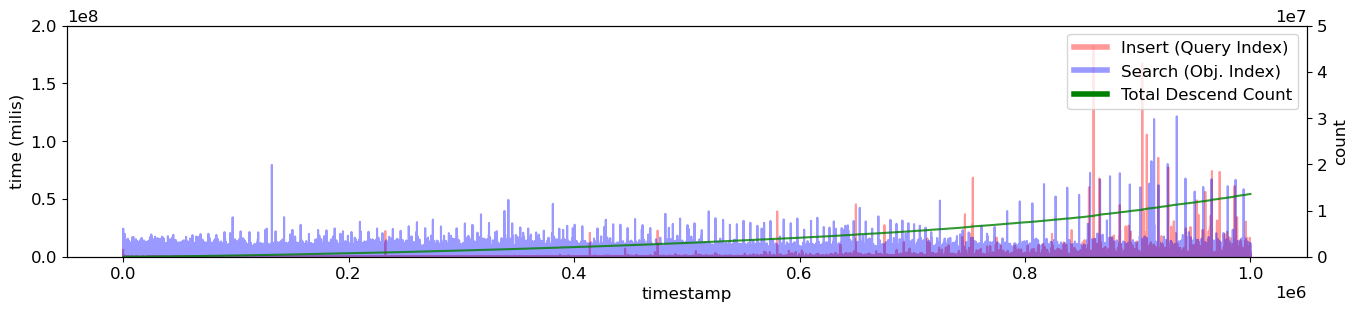

In [6]:
plot_all_ins(fast_const_buffer)

<Axes: xlabel='operation', ylabel='time (nano)'>

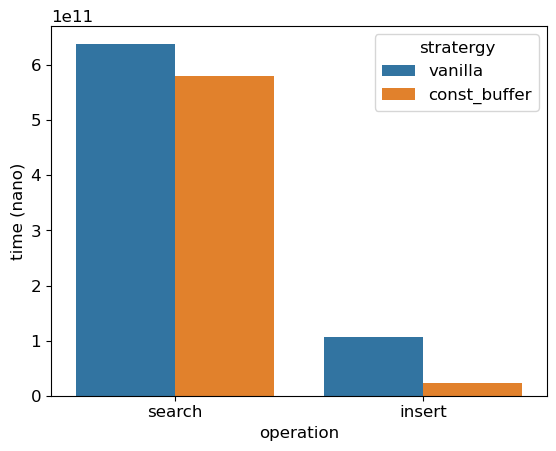

In [7]:
sum_map = [
    {"stratergy": "vanilla", "search": fast_base[fast_base['stage'] == "INSERT"]['search_time'].sum(), "insert": fast_base[fast_base['stage'] == "INSERT"]['insert_time'].sum()},
    {"stratergy": "const_buffer", "search": fast_const_buffer[fast_const_buffer['stage'] == "INSERT"]['search_time'].sum(), "insert": fast_const_buffer[fast_const_buffer['stage'] == "INSERT"]['insert_time'].sum()}
]
sum_df = pd.DataFrame(sum_map).melt(id_vars=['stratergy'], var_name="operation", value_name="time (nano)")
sns.barplot(x='operation', y='time (nano)', hue='stratergy', data=sum_df)

# Search time

In [8]:
fast_base[(fast_base['stage'] == 'SEARCH') & (fast_base['search_time'] > 10000000)].sort_values('search_time', ascending=False)

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1418883,518883,598979817,10758,0.0,-1,42413206,-1,SEARCH
1003154,103154,152675502,23393,0.0,-1,42409665,-1,SEARCH
1454242,554242,45987528,8828,0.0,-1,42413632,-1,SEARCH
1000002,100002,23178088,13761,0.0,-1,42409665,-1,SEARCH
1199125,299125,15991317,37235,0.0,-1,42410906,-1,SEARCH
1199059,299059,15796549,16755,0.0,-1,42410906,-1,SEARCH


In [9]:
fast_const_buffer[(fast_const_buffer['stage'] == 'SEARCH') & (fast_const_buffer['search_time'] > 10000000)].sort_values('search_time', ascending=False)

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1394597,494597,261413613,57536,0.0,-1,13579624,-1,SEARCH
1029355,129355,132466348,3881,0.0,-1,13576667,-1,SEARCH
1000002,100002,10654178,20577,0.0,-1,13576667,-1,SEARCH


In [10]:
def plot_all_search(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 10000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    # plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Obj. Index)', 'Search (Query Index)', 'Total Descend Count'])

    plt.show()

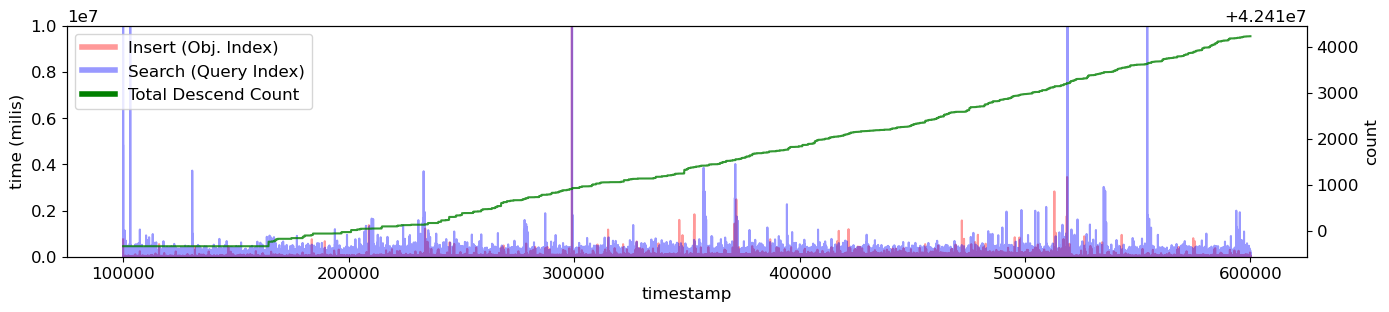

In [11]:
plot_all_search(fast_base)

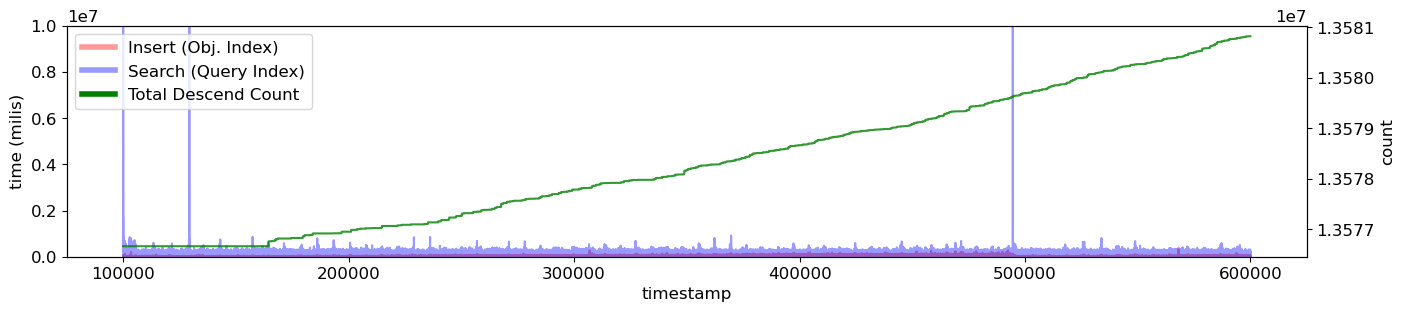

In [12]:
plot_all_search(fast_const_buffer)

In [13]:
fast_const_buffer[fast_const_buffer['stage'] == 'SEARCH']

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1000000,100000,1699836,33978,0.0,-1,13576667,-1,SEARCH
1000001,100001,236612,65926,0.0,-1,13576667,-1,SEARCH
1000002,100002,10654178,20577,0.0,-1,13576667,-1,SEARCH
1000003,100003,83715,7168,0.0,-1,13576667,-1,SEARCH
1000004,100004,132440,2782,0.0,-1,13576667,-1,SEARCH
...,...,...,...,...,...,...,...,...
1499995,599995,145304,12057,0.0,-1,13580819,-1,SEARCH
1499996,599996,58640,5260,0.0,-1,13580819,-1,SEARCH
1499997,599997,20025,2242,0.0,-1,13580819,-1,SEARCH
1499998,599998,23402,3485,0.0,-1,13580819,-1,SEARCH


## Both

In [14]:
fail

NameError: name 'fail' is not defined

In [ ]:
def plot_all_both(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df.loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df.loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 100000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df.loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Obj. Index -> Query Index)', 'Search (Query Index -> Obj. Index)', 'Total Descend Count'])

    plt.show()

In [ ]:
plot_all_both(fast_base)

In [ ]:
plot_all_both(fast_const_buffer)